# Task 3: FISTA algorithm
FISTA is acronym of "Fast Iterative Shrinkage-Thresholding Algorithm"

In [84]:
import numpy as np
import math
import time
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

These are the helper functions for the optimization algorithm

In [85]:
# Returns a vector, which is the result of the gradient
def gradient(A, b, x):
    return A.dot(x) - b

# Returns a scalar, which is the norm of the result above
def gradientNorm(A, b, x):
    return np.linalg.norm(A.dot(x) - b)

# Returns a scalar, which is the norm of the difference between x and x*
def differenceNorm(x, x_opt):
    return np.linalg.norm(x - x_opt)

# Returns a scalar, which is the norm of x
def norm(x):
    return np.linalg.norm(x)

![image.png](images/FISTA.png)

### The FISTA algorithm implementation

In [86]:
def FISTA(A, b, maxIters = 5000, epsilon = 10e-5):    
    # Dimension of A and b
    dim = b.size
    # initial random vector x0 filled with the mean of matrix A, with length equal to the dimension
    x = np.repeat(np.mean(A), dim)
    # assign y1 equals to x0
    y = x
    # assign t equals to 1
    t = 1
    # currentIteration
    iter = 1
    # Saving the results
    x_iterations = []
    y_iterations = []
    t_iterations = []

    gradients = []
    
    L = 0.5 * np.linalg.norm(A * A.transpose())
    
    while (gradientNorm(A, b, x) > epsilon and iter <= maxIters):
        # For example, this is the first iteration, where k = 1 (iter = 1)
        # Saving the previous x, which is x0
        previous_x = x
        # x is now x1, y ix now y1
        x = y - 1/L * gradient(A, b, y)
        x_iterations.append(x)
        # Saving the previous t, which is t1
        previous_t = t
        # t is now t2 and the latter t is still t1
        t = 1/2 * (1 + math.sqrt(1 + 4 * (previous_t ** 2)))
        # y is now y2, x is x1 and x_previous is x0
        y = x + (previous_t - 1)/t * (x - previous_x)
        iter += 1
    
    if iter > maxIters:
        stoppingReason = f"Max iterations ({maxIters}) exceeded"
    else:
        stoppingReason = f"Gradient norm smaller than {epsilon}\nCompleted iteration: {iter - 1}"
    differenceNorms = []
    for x_sol in x_iterations:
        differenceNorms.append(differenceNorm(x_sol, x))
    differenceNorms = np.array(differenceNorms)
    return (x, x_iterations, differenceNorms, stoppingReason)

### Plotting and analyzing the results

In [110]:
# Plotting the difference norms log ||x - x*||2
def plotDifferenceNorms(scale, maxIter, tolerance, algorithmName, algorithm):

    A = np.load(f"{scale}Matrix.npy", allow_pickle=True)
    # print("The matrix A")
    # print(A)

    b = np.load(f"{scale}Vector.npy", allow_pickle=True)
    # print("\nThe vector b")
    # print(b)
    x_opt = np.load(f"{scale}Solution.npy", allow_pickle=True)

    print(f"\nThe {scale} scale problem is chosen. The matrix A and vector b dimension is {b.size}")
    print(f"The number of maximum iterations is {maxIter}. The allowed tolerance for gradient norm is {tolerance}" )

    start = time.time()
    x_opt_GD, x_iterations_GD, differenceNorms, stoppingReason = algorithm(A, b, maxIter, tolerance)
    end = time.time()
    print(f"\nThe {algorithmName} algorithm runs in {end - start} seconds")
    print("Reason of stopping")
    print(stoppingReason)
    if scale == "huge":
        print("\nFirst 100 values in the optimal solution x found by FISTA algorithm")
        print(x_opt_GD[0:100])
        print("\nFirst 100 values in the theoretical optimal solution x*")
        print(x_opt[0:100])
    else:
        print("\nThe optimal solution x found by FISTA algorithm")
        print(x_opt_GD)
        print("\nThe theoretical optimal solution x*")
        print(x_opt)

    figure(figsize=(6, 4), dpi=80)

    iterations = np.arange(1, differenceNorms.size + 1, 1)

    plt.plot(iterations, differenceNorms, label = f"Experimental convergence rate")#, marker='.', markersize=5)
  
    size = 14

    plt.title(f"Convergence rate of\n{algorithmName} algorithm", size=size + 6)
    plt.xticks(fontsize=size)    
    plt.yticks(fontsize=size)  
    plt.yscale('log')
    # plt.xlim(left = 1)
    # plt.xticks(list(plt.xticks()[0]) + [1])
    plt.xlabel("Iterations", size=size)
    plt.ylabel(r'$log||x-x*||_2$', size=size)

    legend = plt.legend(loc=3, frameon=False, fontsize=size)
    plt.show()


The small scale problem is chosen. The matrix A and vector b dimension is 10
The number of maximum iterations is 5000. The allowed tolerance for gradient norm is 0.0001

The FISTA algorithm runs in 0.03799867630004883 seconds
Reason of stopping
Gradient norm smaller than 0.0001
Completed iteration: 1601

The optimal solution x found by FISTA algorithm
[ 0.99879422  2.00092888  3.00222754  4.00189825  5.00266997  6.00186272
  6.99757942  7.99656192  8.99562238 10.00036613]

The theoretical optimal solution x*
[ 1  2  3  4  5  6  7  8  9 10]


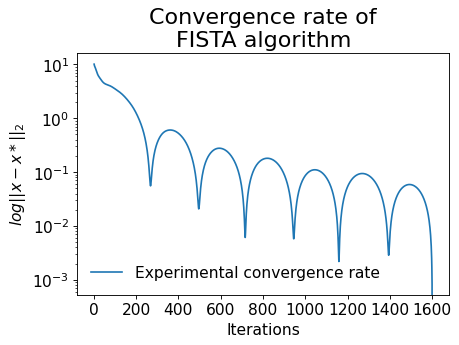


The large scale problem is chosen. The matrix A and vector b dimension is 100
The number of maximum iterations is 20000. The allowed tolerance for gradient norm is 0.001

The FISTA algorithm runs in 3.9629995822906494 seconds
Reason of stopping
Gradient norm smaller than 0.001
Completed iteration: 14264

The optimal solution x found by FISTA algorithm
[  3.71229113   5.26640397  -1.54827337   6.19255553   3.93767982
   9.46084375  13.96773733   5.48134314   6.61543918  10.32529221
  18.37213129  15.61903408  10.96132777  15.1561322   21.23972789
  24.02545987  18.27308692  12.78175028  21.806541    16.54192916
  25.45673265  26.5792106   24.18466693  20.01544604  30.9703181
  31.03034043  25.51749105  29.71587971  23.97480193  30.52872355
  32.4171322   32.49380434  37.67850031  36.95302245  39.18332497
  38.21505766  32.10280343  44.30547328  38.89559617  44.64048563
  42.65597229  46.34058152  43.90586817  46.84533762  35.74749847
  34.31933815  43.38796125  39.28965767  44.36580528

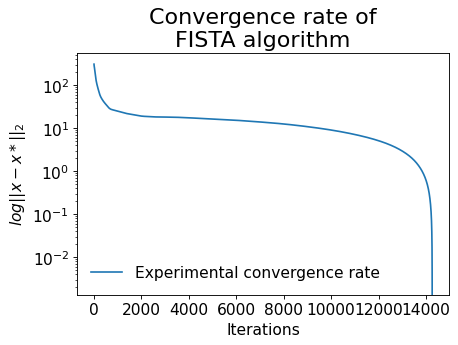


The huge scale problem is chosen. The matrix A and vector b dimension is 1000
The number of maximum iterations is 50000. The allowed tolerance for gradient norm is 0.01

The FISTA algorithm runs in 32.9060378074646 seconds
Reason of stopping
Max iterations (50000) exceeded

First 100 values in the optimal solution x found by FISTA algorithm
[  1.00458804   3.4384433   -5.57471772  -3.75919027  -2.11041122
  -3.1570348   20.94844564   8.2899845    6.26223849  28.5531545
  22.24321717   8.98834582   7.82508174  11.22398469  -0.92050712
  25.69520903  29.29508454  22.09257455   4.68805256  37.79054833
  11.45127728  24.50793688  34.64851493  20.70675251  31.45232596
  30.24555234  41.62820063  29.20268111  28.42841794  45.49064321
  14.24563292  31.04983475  34.45433114  27.30861635  19.81847456
  30.45749073  20.32855382  45.6871264   29.99227164  51.63301258
  59.48625022  31.36434716  32.66959988  36.91407108  32.39007029
  50.07449049  49.54793598  65.50993384  32.40713535  39.458916

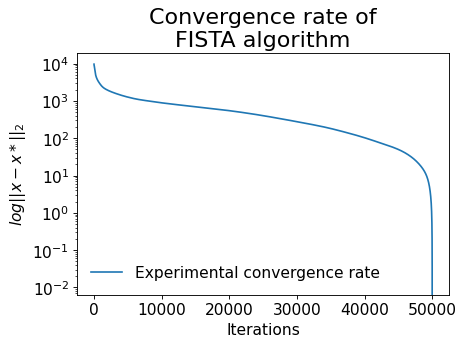

In [111]:
scales = ["small", "large", "huge"]
maxIters = [5000, 20000, 50000]
tolerances = [10e-5, 10e-4, 10e-3]
algorithmName = "FISTA"
algorithm = FISTA
for i in range(0,3):
    plotDifferenceNorms(scales[i], maxIters[i], tolerances[i], algorithmName, algorithm)